## 카테고리 분석 의미

https://datascienceschool.net/view-notebook/ee68270ffffd4a87b71f33a2e1a0cfef/

$K$개의 복수의 카테고리 값을 가지는 더미 변수의 영향을 보기 위해서는 F-검정을 통해 복수 개의 모형을 비교하는 분산 분석을 사용할 수 있다. 

이 경우에는 분산 분석에 사용되는 각 분산의 의미가 다음과 같다.

* BSS: 각 그룹 평균의 분산 (Between-Group Variance) 
  $$ BSS = \sum_{k=1}^K (\bar{x} - \bar{x}_k)^2 $$

* WSS: 각 그룹 내의 오차의 분산의 합 (Within-Group Variance)
  $$ WSS = \sum_{k=1}^K \sum_{i} (x_{i} - \bar{x}_k)^2 $$

* TSS : 전체 오차의 분산
  $$ TSS = \sum_{i} (x_{i} - \bar{x})^2 $$




| | source  | degree of freedom | mean square | F statstics | 
|-|-|-|-|-|
| Between | $$\text{BSS}$$ | $$K-1$$ | $$\dfrac{\text{ESS}}{K-1}$$   | $$F$$ |
| Within   | $$\text{WSS}$$ | $$N-K$$ | $$\dfrac{\text{RSS}}{N-K}$$ |
| Total      | $$\text{TSS}$$ | $$N-1$$ | $$\dfrac{\text{TSS}}{N-1}$$ |
| $R^2$      | $$\text{BSS} / \text{TSS}$$ | 

이 때 F-검정의 귀무가설은 $\text{BSS}=0$ 즉 $\text{WSS}=\text{TSS}$ 이다. 즉, 그룹간 차이가 없는 경우이다.

## 우리 데이터 적용해보기 

In [20]:
taxi <- read.csv("modify1.csv")

## 1. 월별

In [21]:
model <- lm("trip_duration ~ month", data=taxi)
summary(model)


Call:
lm(formula = "trip_duration ~ month", data = taxi)

Residuals:
   Min     1Q Median     3Q    Max 
-864.8 -434.4 -178.8  228.9 9892.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 788.7541     1.3220  596.64   <2e-16 ***
month        22.8351     0.3397   67.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 653.2 on 1310320 degrees of freedom
Multiple R-squared:  0.003437,	Adjusted R-squared:  0.003437 
F-statistic:  4520 on 1 and 1310320 DF,  p-value: < 2.2e-16


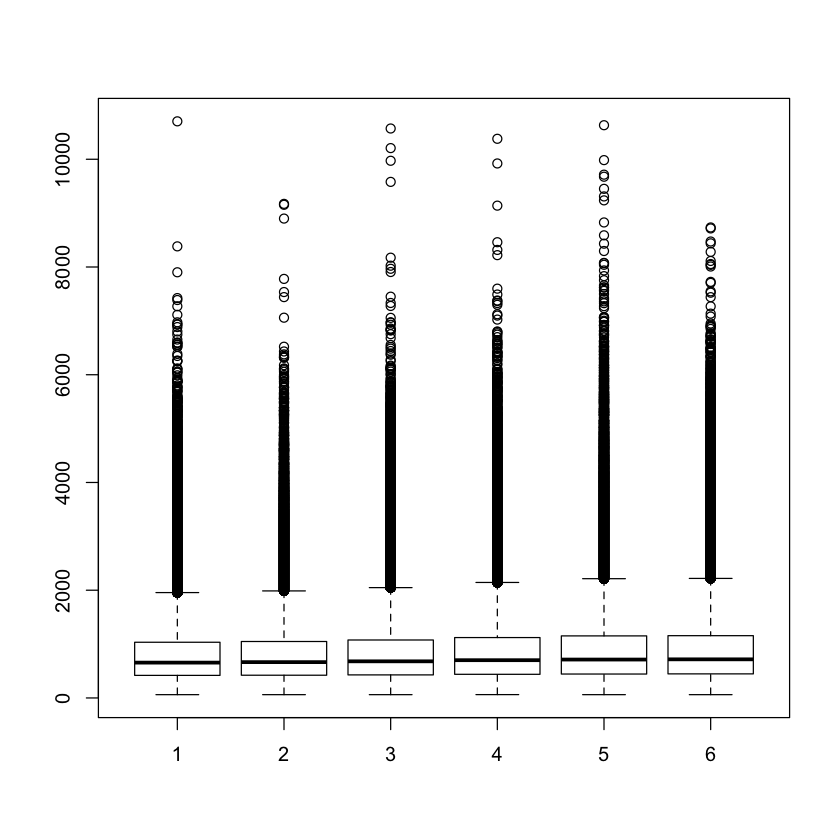

In [22]:
boxplot(trip_duration ~ month, data=taxi)

In [23]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
month,1,1928084072,1928084072,4519.579,0
Residuals,1310320,558991658849,426607,NA,NA


In [24]:
oneway.test(trip_duration ~ month, data=taxi, var.equal=T)


	One-way analysis of means

data:  trip_duration and month
F = 950.02, num df = 5, denom df = 1310300, p-value < 2.2e-16


In [25]:
oneway.test(trip_duration ~ month, data=taxi)


	One-way analysis of means (not assuming equal variances)

data:  trip_duration and month
F = 932.26, num df = 5, denom df = 609640, p-value < 2.2e-16


$\rightarrow$ 그룹간 차이가 있다는 것을 확인

## 2. 요일별

In [27]:
model <- lm("trip_duration ~ dayofweek", data=taxi)
summary(model)


Call:
lm(formula = "trip_duration ~ dayofweek", data = taxi)

Residuals:
   Min     1Q Median     3Q    Max 
-844.5 -435.7 -179.7  229.1 9798.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  905.484      1.059  854.88   <2e-16 ***
dayofweek    -11.929      0.291  -40.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 653.9 on 1310320 degrees of freedom
Multiple R-squared:  0.00128,	Adjusted R-squared:  0.00128 
F-statistic:  1680 on 1 and 1310320 DF,  p-value: < 2.2e-16


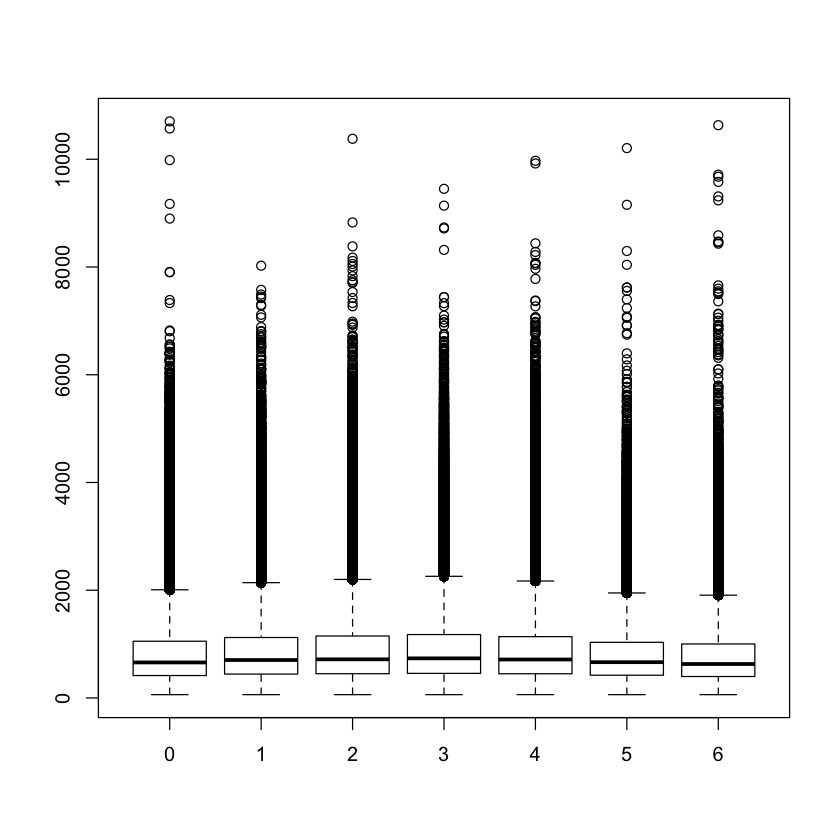

In [28]:
boxplot(trip_duration ~ dayofweek, data=taxi)

In [29]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
dayofweek,1,718253403,718253403.2,1680.006,0
Residuals,1310320,560201489518,427530.3,NA,NA


In [30]:
oneway.test(trip_duration ~ dayofweek, data=taxi, var.equal=T)


	One-way analysis of means

data:  trip_duration and dayofweek
F = 1268.1, num df = 6, denom df = 1310300, p-value < 2.2e-16


In [31]:
oneway.test(trip_duration ~ dayofweek, data=taxi)


	One-way analysis of means (not assuming equal variances)

data:  trip_duration and dayofweek
F = 1358.6, num df = 6, denom df = 579020, p-value < 2.2e-16


$\rightarrow$ 그룹간 차이가 있다는 것을 확인

## 3. 시간별

In [33]:
model <- lm("trip_duration ~ hour", data=taxi)
summary(model)


Call:
lm(formula = "trip_duration ~ hour", data = taxi)

Residuals:
   Min     1Q Median     3Q    Max 
-835.8 -435.9 -180.8  228.0 9822.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 828.40199    1.33152  622.15   <2e-16 ***
hour          2.97352    0.08826   33.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 654 on 1310320 degrees of freedom
Multiple R-squared:  0.0008656,	Adjusted R-squared:  0.0008648 
F-statistic:  1135 on 1 and 1310320 DF,  p-value: < 2.2e-16


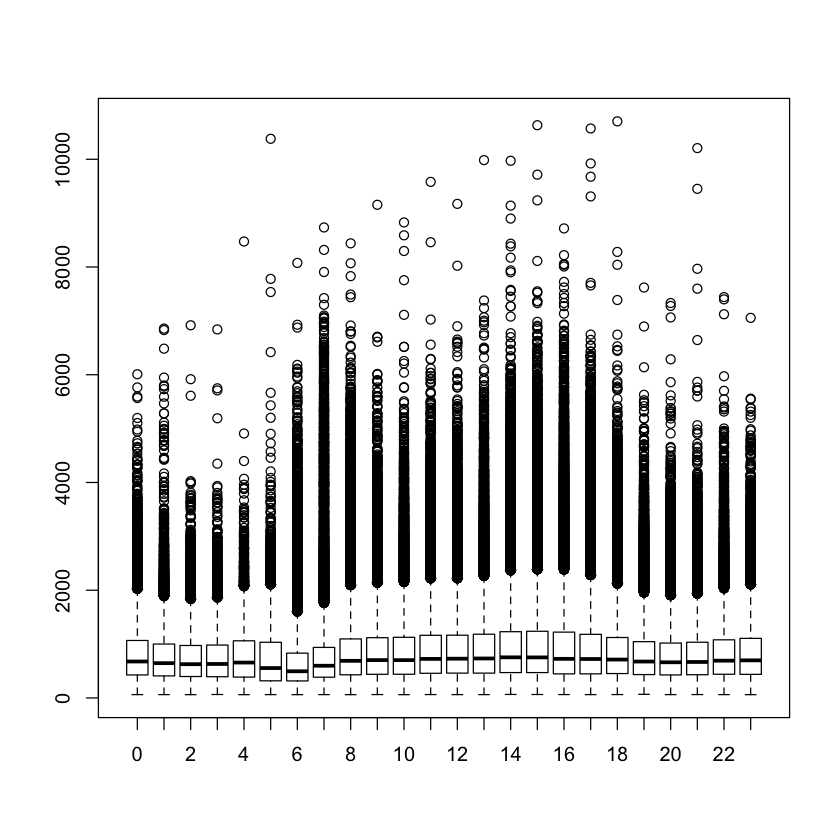

In [34]:
boxplot(trip_duration ~ hour, data=taxi)

In [35]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
hour,1,485522500,485522499.6,1135.173,9.576924e-249
Residuals,1310320,560434220421,427707.9,NA,NA


In [36]:
oneway.test(trip_duration ~ hour, data=taxi, var.equal=T)


	One-way analysis of means

data:  trip_duration and hour
F = 869.88, num df = 23, denom df = 1310300, p-value < 2.2e-16


In [37]:
oneway.test(trip_duration ~ hour, data=taxi)


	One-way analysis of means (not assuming equal variances)

data:  trip_duration and hour
F = 797, num df = 23, denom df = 356770, p-value < 2.2e-16


$\rightarrow$ 그룹간 차이가 있다는 것을 확인